# 신용카드 연체자 예측 모델

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [191]:
data = pd.read_csv('./data.csv')

In [128]:
data.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 변수명 설명

Name|Mean
:---|:---
LIMIT_BAL| Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX| Gender (1=male, 2=female)
EDUCATION| (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE| Marital status (1=married, 2=single, 3=others)
AGE| Age in years
PAY_0| Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2| Repayment status in August, 2005 (scale same as above)
PAY_3| Repayment status in July, 2005 (scale same as above)
PAY_4| Repayment status in June, 2005 (scale same as above)
PAY_5| Repayment status in May, 2005 (scale same as above)
PAY_6| Repayment status in April, 2005 (scale same as above)
BILL_AMT1| Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2| Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3| Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4| Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5| Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6| Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1| Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2| Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3| Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4| Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5| Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6| Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month| Default payment (1=yes, 0=no)


In [129]:
# 띄어쓰기가 포함된 index명 변경
data.columns = list(data.columns[:23]) + ["default"]

In [130]:
data.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object

# 결측값 찾기

In [131]:
data = data.replace(0, np.nan)

In [132]:
data.isnull().sum()

LIMIT_BAL        0
SEX              0
EDUCATION       14
MARRIAGE        54
AGE              0
PAY_0        14737
PAY_2        15730
PAY_3        15764
PAY_4        16455
PAY_5        16947
PAY_6        16286
BILL_AMT1     2008
BILL_AMT2     2506
BILL_AMT3     2870
BILL_AMT4     3195
BILL_AMT5     3506
BILL_AMT6     4020
PAY_AMT1      5249
PAY_AMT2      5396
PAY_AMT3      5968
PAY_AMT4      6408
PAY_AMT5      6703
PAY_AMT6      7173
default      23364
dtype: int64

In [133]:
data.mean(axis=0)

LIMIT_BAL    167484.322667
SEX               1.603733
EDUCATION         1.853999
MARRIAGE          1.554665
AGE              35.485500
PAY_0            -0.032824
PAY_2            -0.281219
PAY_3            -0.350239
PAY_4            -0.488741
PAY_5            -0.611813
PAY_6            -0.636795
BILL_AMT1     54897.825343
BILL_AMT2     53661.608169
BILL_AMT3     51986.533137
BILL_AMT4     48419.640701
BILL_AMT5     45645.883181
BILL_AMT6     44886.559353
PAY_AMT1       6864.668700
PAY_AMT2       7219.757153
PAY_AMT3       6523.404003
PAY_AMT4       6136.923788
PAY_AMT5       6180.264798
PAY_AMT6       6854.386341
default           1.000000
dtype: float64

In [134]:
data.median(axis=0)

LIMIT_BAL    140000.0
SEX               2.0
EDUCATION         2.0
MARRIAGE          2.0
AGE              34.0
PAY_0            -1.0
PAY_2            -1.0
PAY_3            -1.0
PAY_4            -1.0
PAY_5            -1.0
PAY_6            -1.0
BILL_AMT1     26732.5
BILL_AMT2     26848.0
BILL_AMT3     25925.5
BILL_AMT4     23437.0
BILL_AMT5     21319.0
BILL_AMT6     20818.5
PAY_AMT1       3000.0
PAY_AMT2       3000.0
PAY_AMT3       2499.0
PAY_AMT4       2200.0
PAY_AMT5       2300.0
PAY_AMT6       2386.0
default           1.0
dtype: float64

# 결측값 채우기

In [142]:
data[["default"]] = data[["default"]].fillna(0)

In [143]:
def fill_na(list):
    for i in range(len(list)):
        n = list[i]
        data[[n]] = data[[n]].fillna(0)

In [144]:
def fill_median(list):
    for i in range(len(list)):
        n = list[i]
        data[[n]] = data[[n]].fillna(data.median()[[n]])

In [145]:
def fill_mean(list):
    for i in range(len(list)):
        n = list[i]
        data[[n]] = data[[n]].fillna(data.mean()[[n]])

In [146]:
list_p = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
list_b = ["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]
list_pa = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]

In [147]:
fill_median(list_p)
fill_na(list_b)
fill_na(list_pa)

In [148]:
data.isnull().sum()

LIMIT_BAL     0
SEX           0
EDUCATION    14
MARRIAGE     54
AGE           0
PAY_0         0
PAY_2         0
PAY_3         0
PAY_4         0
PAY_5         0
PAY_6         0
BILL_AMT1     0
BILL_AMT2     0
BILL_AMT3     0
BILL_AMT4     0
BILL_AMT5     0
BILL_AMT6     0
PAY_AMT1      0
PAY_AMT2      0
PAY_AMT3      0
PAY_AMT4      0
PAY_AMT5      0
PAY_AMT6      0
default       0
dtype: int64

In [149]:
cdata = data.dropna()

In [150]:
cdata.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

# 데이터 살피기

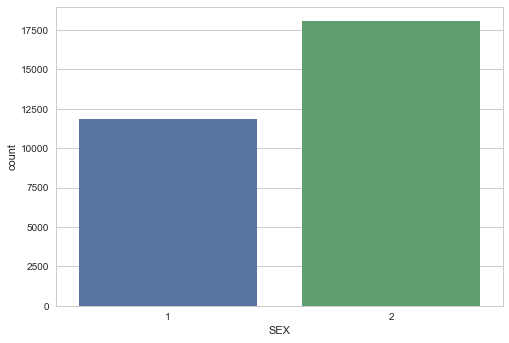

In [151]:
sns.countplot(cdata["SEX"])
plt.show()

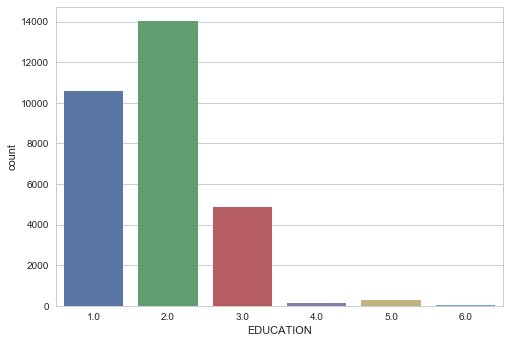

In [152]:
sns.countplot(cdata["EDUCATION"])
plt.show()

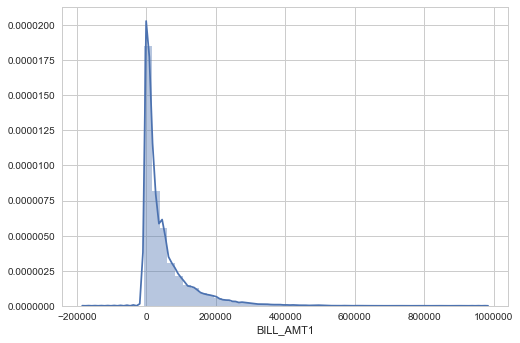

In [153]:
sns.distplot(cdata["BILL_AMT1"])
plt.show()

# One-hot Encoding

In [154]:
features = ['LIMIT_BAL', 'AGE'] + list_p + list_b + list_pa + ["default"]

categorical = ['SEX', 'EDUCATION', 'MARRIAGE']

In [155]:
def one_hot_encoder(loan):
    categorical_variables = categorical
    loan_one_hot_encoded = pd.get_dummies(loan, columns=categorical_variables)
    print("====================[Data Types]====================")
    print(loan_one_hot_encoded.dtypes)
    return loan_one_hot_encoded
edata = one_hot_encoder(cdata)

====================[Data Types]====================
LIMIT_BAL          int64
AGE                int64
PAY_0            float64
PAY_2            float64
PAY_3            float64
PAY_4            float64
PAY_5            float64
PAY_6            float64
BILL_AMT1        float64
BILL_AMT2        float64
BILL_AMT3        float64
BILL_AMT4        float64
BILL_AMT5        float64
BILL_AMT6        float64
PAY_AMT1         float64
PAY_AMT2         float64
PAY_AMT3         float64
PAY_AMT4         float64
PAY_AMT5         float64
PAY_AMT6         float64
default          float64
SEX_1              uint8
SEX_2              uint8
EDUCATION_1.0      uint8
EDUCATION_2.0      uint8
EDUCATION_3.0      uint8
EDUCATION_4.0      uint8
EDUCATION_5.0      uint8
EDUCATION_6.0      uint8
MARRIAGE_1.0       uint8
MARRIAGE_2.0       uint8
MARRIAGE_3.0       uint8
dtype: object


In [156]:
edata.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_2,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,EDUCATION_5.0,EDUCATION_6.0,MARRIAGE_1.0,MARRIAGE_2.0,MARRIAGE_3.0
0,20000,24,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,...,1,0,1,0,0,0,0,1,0,0
1,120000,26,-1.0,2.0,-1.0,-1.0,-1.0,2.0,2682.0,1725.0,...,1,0,1,0,0,0,0,0,1,0
2,90000,34,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,29239.0,14027.0,...,1,0,1,0,0,0,0,0,1,0
3,50000,37,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,46990.0,48233.0,...,1,0,1,0,0,0,0,1,0,0
4,50000,57,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,8617.0,5670.0,...,0,0,1,0,0,0,0,1,0,0


# Train-Test 나누기

In [157]:
from sklearn.model_selection import train_test_split

# Train-Test split
y = edata.default
X = edata.drop("default", axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [158]:
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (23945, 31)
Shape of y_train:  (23945,)
Shape of x_test:  (5987, 31)
Shape of y_test:  (5987,)


In [159]:
x_train.head(5)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_2,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,EDUCATION_5.0,EDUCATION_6.0,MARRIAGE_1.0,MARRIAGE_2.0,MARRIAGE_3.0
29640,200000,37,-2.0,-1.0,-1.0,-1.0,-1.0,-1.0,500.0,598.0,...,0,0,1,0,0,0,0,1,0,0
16868,350000,43,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,6088.0,3405.0,...,0,0,1,0,0,0,0,1,0,0
20922,360000,46,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,8746.0,3093.0,...,0,0,1,0,0,0,0,1,0,0
14317,360000,27,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,1994.0,5305.0,...,1,1,0,0,0,0,0,0,1,0
18280,200000,54,1.0,2.0,-1.0,-1.0,-1.0,-1.0,7111.0,4803.0,...,0,1,0,0,0,0,0,1,0,0


In [160]:
y_train.head(5)

29640    1.0
16868    0.0
20922    1.0
14317    0.0
18280    0.0
Name: default, dtype: float64

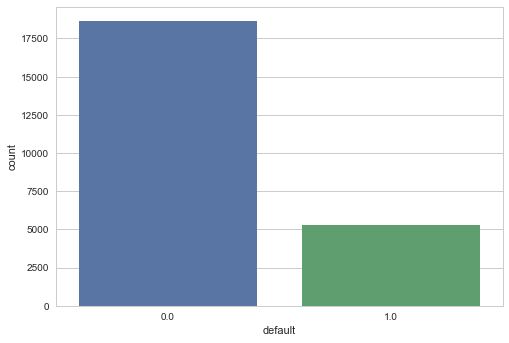

In [161]:
sns.countplot(y_train)
plt.show()

In [189]:
per = y_train.sum() / y_train.count()
print("X: ", per)
print("O: ", 1 - per)

X:  0.221549384005
O:  0.778450615995


# Neural Network Modeling

In [163]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization

In [183]:
model = Sequential() # NN모델이 생성
model.add(Dense(16, input_dim = 31, kernel_initializer= 'uniform', activation= 'relu'))
#model.add(Dense(8, kernel_initializer= 'he_normal', activation= 'relu'))
model.add(BatchNormalization())
#model.add(Dense(16, kernel_initializer= 'he_normal', activation= 'relu'))
model.add(Dense(8, kernel_initializer= 'he_normal', activation= 'relu'))
model.add(BatchNormalization())
model.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer= 'Adadelta', metrics= ['accuracy'])

In [184]:
model.fit(np.array(x_train), np.array(y_train), epochs= 1000, batch_size= 100, vervose=)

Epoch 1/1000
23945/23945 [==============================] - 1s - loss: 0.6503 - acc: 0.6667     
Epoch 2/1000
23945/23945 [==============================] - 0s - loss: 0.5141 - acc: 0.7752     
Epoch 3/1000
23945/23945 [==============================] - 0s - loss: 0.4971 - acc: 0.7769     - ETA: 0s - loss: 0.4985 - acc: 
Epoch 4/1000
23945/23945 [==============================] - 0s - loss: 0.4976 - acc: 0.7763     
Epoch 5/1000
23945/23945 [==============================] - 0s - loss: 0.4969 - acc: 0.7770     
Epoch 6/1000
23945/23945 [==============================] - 0s - loss: 0.4953 - acc: 0.7779     
Epoch 7/1000
23945/23945 [==============================] - 0s - loss: 0.4946 - acc: 0.7782     
Epoch 8/1000
23945/23945 [==============================] - 0s - loss: 0.4938 - acc: 0.7787     
Epoch 9/1000
23945/23945 [==============================] - 0s - loss: 0.4952 - acc: 0.7777     
Epoch 10/1000
23945/23945 [==============================] - 0s - loss: 0.4939 - acc: 0.7778   

23945/23945 [==============================] - 0s - loss: 0.4784 - acc: 0.7833     
Epoch 84/1000
23945/23945 [==============================] - 0s - loss: 0.4779 - acc: 0.7848     
Epoch 85/1000
23945/23945 [==============================] - 0s - loss: 0.4771 - acc: 0.7862     
Epoch 86/1000
23945/23945 [==============================] - 0s - loss: 0.4773 - acc: 0.7849     
Epoch 87/1000
23945/23945 [==============================] - 0s - loss: 0.4772 - acc: 0.7858     
Epoch 88/1000
23945/23945 [==============================] - 0s - loss: 0.4775 - acc: 0.7845     
Epoch 89/1000
23945/23945 [==============================] - 0s - loss: 0.4774 - acc: 0.7859     
Epoch 90/1000
23945/23945 [==============================] - 0s - loss: 0.4780 - acc: 0.7853     
Epoch 91/1000
23945/23945 [==============================] - 0s - loss: 0.4773 - acc: 0.7862     
Epoch 92/1000
23945/23945 [==============================] - 0s - loss: 0.4777 - acc: 0.7856     
Epoch 93/1000
23945/23945 [=======

23945/23945 [==============================] - 0s - loss: 0.4760 - acc: 0.7862     
Epoch 167/1000
23945/23945 [==============================] - 0s - loss: 0.4755 - acc: 0.7871     
Epoch 168/1000
23945/23945 [==============================] - 0s - loss: 0.4765 - acc: 0.7872     
Epoch 169/1000
23945/23945 [==============================] - 0s - loss: 0.4750 - acc: 0.7878     
Epoch 170/1000
23945/23945 [==============================] - 0s - loss: 0.4752 - acc: 0.7870     
Epoch 171/1000
23945/23945 [==============================] - 0s - loss: 0.4756 - acc: 0.7882     
Epoch 172/1000
23945/23945 [==============================] - 0s - loss: 0.4751 - acc: 0.7874     
Epoch 173/1000
23945/23945 [==============================] - 0s - loss: 0.4754 - acc: 0.7880     
Epoch 174/1000
23945/23945 [==============================] - 0s - loss: 0.4749 - acc: 0.7879     
Epoch 175/1000
23945/23945 [==============================] - 0s - loss: 0.4747 - acc: 0.7884     
Epoch 176/1000
23945/2394

23945/23945 [==============================] - 0s - loss: 0.4740 - acc: 0.7897     
Epoch 249/1000
23945/23945 [==============================] - 0s - loss: 0.4727 - acc: 0.7889     
Epoch 250/1000
23945/23945 [==============================] - 0s - loss: 0.4748 - acc: 0.7878     
Epoch 251/1000
23945/23945 [==============================] - 0s - loss: 0.4740 - acc: 0.7880     
Epoch 252/1000
23945/23945 [==============================] - 0s - loss: 0.4730 - acc: 0.7889     
Epoch 253/1000
23945/23945 [==============================] - 0s - loss: 0.4741 - acc: 0.7883     
Epoch 254/1000
23945/23945 [==============================] - 0s - loss: 0.4741 - acc: 0.7902     
Epoch 255/1000
23945/23945 [==============================] - 0s - loss: 0.4734 - acc: 0.7886     
Epoch 256/1000
23945/23945 [==============================] - 0s - loss: 0.4744 - acc: 0.7896     
Epoch 257/1000
23945/23945 [==============================] - 0s - loss: 0.4748 - acc: 0.7884     
Epoch 258/1000
23945/2394

23945/23945 [==============================] - 0s - loss: 0.4718 - acc: 0.7911     
Epoch 331/1000
23945/23945 [==============================] - 0s - loss: 0.4726 - acc: 0.7879     
Epoch 332/1000
23945/23945 [==============================] - 0s - loss: 0.4729 - acc: 0.7893     
Epoch 333/1000
23945/23945 [==============================] - 0s - loss: 0.4729 - acc: 0.7896     
Epoch 334/1000
23945/23945 [==============================] - 0s - loss: 0.4718 - acc: 0.7904     
Epoch 335/1000
23945/23945 [==============================] - 0s - loss: 0.4719 - acc: 0.7904     
Epoch 336/1000
23945/23945 [==============================] - 0s - loss: 0.4713 - acc: 0.7908     
Epoch 337/1000
23945/23945 [==============================] - 0s - loss: 0.4713 - acc: 0.7892     
Epoch 338/1000
23945/23945 [==============================] - 0s - loss: 0.4718 - acc: 0.7906     
Epoch 339/1000
23945/23945 [==============================] - 0s - loss: 0.4720 - acc: 0.7903     
Epoch 340/1000
23945/2394

23945/23945 [==============================] - 0s - loss: 0.4713 - acc: 0.7903     
Epoch 413/1000
23945/23945 [==============================] - 0s - loss: 0.4716 - acc: 0.7904     
Epoch 414/1000
23945/23945 [==============================] - 0s - loss: 0.4718 - acc: 0.7905     
Epoch 415/1000
23945/23945 [==============================] - 0s - loss: 0.4720 - acc: 0.7901     
Epoch 416/1000
23945/23945 [==============================] - 0s - loss: 0.4729 - acc: 0.7892     
Epoch 417/1000
23945/23945 [==============================] - 0s - loss: 0.4723 - acc: 0.7881     
Epoch 418/1000
23945/23945 [==============================] - 0s - loss: 0.4731 - acc: 0.7904     
Epoch 419/1000
23945/23945 [==============================] - 0s - loss: 0.4722 - acc: 0.7904     
Epoch 420/1000
23945/23945 [==============================] - 0s - loss: 0.4724 - acc: 0.7903     
Epoch 421/1000
23945/23945 [==============================] - 0s - loss: 0.4719 - acc: 0.7891     
Epoch 422/1000
23945/2394

23945/23945 [==============================] - 0s - loss: 0.4712 - acc: 0.7911     - ETA: 0s - loss: 0.4681 - acc: 0.
Epoch 495/1000
23945/23945 [==============================] - 0s - loss: 0.4711 - acc: 0.7904     
Epoch 496/1000
23945/23945 [==============================] - 0s - loss: 0.4696 - acc: 0.7910     
Epoch 497/1000
23945/23945 [==============================] - 0s - loss: 0.4703 - acc: 0.7894     
Epoch 498/1000
23945/23945 [==============================] - 0s - loss: 0.4700 - acc: 0.7895     
Epoch 499/1000
23945/23945 [==============================] - 0s - loss: 0.4709 - acc: 0.7905     
Epoch 500/1000
23945/23945 [==============================] - 0s - loss: 0.4710 - acc: 0.7901     
Epoch 501/1000
23945/23945 [==============================] - 0s - loss: 0.4709 - acc: 0.7916     
Epoch 502/1000
23945/23945 [==============================] - 0s - loss: 0.4716 - acc: 0.7893     
Epoch 503/1000
23945/23945 [==============================] - 0s - loss: 0.4707 - acc: 0.7

23945/23945 [==============================] - 0s - loss: 0.4715 - acc: 0.7891     
Epoch 577/1000
23945/23945 [==============================] - 0s - loss: 0.4713 - acc: 0.7909     
Epoch 578/1000
23945/23945 [==============================] - 0s - loss: 0.4702 - acc: 0.7903     
Epoch 579/1000
23945/23945 [==============================] - 0s - loss: 0.4698 - acc: 0.7900     
Epoch 580/1000
23945/23945 [==============================] - 0s - loss: 0.4733 - acc: 0.7895     
Epoch 581/1000
23945/23945 [==============================] - 0s - loss: 0.4732 - acc: 0.7904     
Epoch 582/1000
23945/23945 [==============================] - 0s - loss: 0.4735 - acc: 0.7894     
Epoch 583/1000
23945/23945 [==============================] - 0s - loss: 0.4741 - acc: 0.7896     
Epoch 584/1000
23945/23945 [==============================] - 0s - loss: 0.4706 - acc: 0.7910     
Epoch 585/1000
23945/23945 [==============================] - 0s - loss: 0.4704 - acc: 0.7904     
Epoch 586/1000
23945/2394

23945/23945 [==============================] - 0s - loss: 0.4702 - acc: 0.7911     
Epoch 659/1000
23945/23945 [==============================] - 0s - loss: 0.4704 - acc: 0.7902     
Epoch 660/1000
23945/23945 [==============================] - 0s - loss: 0.4708 - acc: 0.7900     
Epoch 661/1000
23945/23945 [==============================] - 0s - loss: 0.4707 - acc: 0.7888     
Epoch 662/1000
23945/23945 [==============================] - 0s - loss: 0.4707 - acc: 0.7900     
Epoch 663/1000
23945/23945 [==============================] - 0s - loss: 0.4705 - acc: 0.7896     
Epoch 664/1000
23945/23945 [==============================] - 0s - loss: 0.4713 - acc: 0.7911     
Epoch 665/1000
23945/23945 [==============================] - 0s - loss: 0.4700 - acc: 0.7913     
Epoch 666/1000
23945/23945 [==============================] - 0s - loss: 0.4710 - acc: 0.7892     
Epoch 667/1000
23945/23945 [==============================] - 0s - loss: 0.4709 - acc: 0.7901     
Epoch 668/1000
23945/2394

23945/23945 [==============================] - 0s - loss: 0.4703 - acc: 0.7913     
Epoch 741/1000
23945/23945 [==============================] - 0s - loss: 0.4706 - acc: 0.7913     
Epoch 742/1000
23945/23945 [==============================] - 0s - loss: 0.4696 - acc: 0.7907     
Epoch 743/1000
23945/23945 [==============================] - 0s - loss: 0.4695 - acc: 0.7910     
Epoch 744/1000
23945/23945 [==============================] - 0s - loss: 0.4694 - acc: 0.7906     
Epoch 745/1000
23945/23945 [==============================] - 0s - loss: 0.4707 - acc: 0.7915     
Epoch 746/1000
23945/23945 [==============================] - 0s - loss: 0.4702 - acc: 0.7914     
Epoch 747/1000
23945/23945 [==============================] - 0s - loss: 0.4711 - acc: 0.7896     
Epoch 748/1000
23945/23945 [==============================] - 0s - loss: 0.4687 - acc: 0.7926     
Epoch 749/1000
23945/23945 [==============================] - 0s - loss: 0.4718 - acc: 0.7906     
Epoch 750/1000
23945/2394

23945/23945 [==============================] - 0s - loss: 0.4701 - acc: 0.7899     
Epoch 823/1000
23945/23945 [==============================] - 0s - loss: 0.4714 - acc: 0.7911     
Epoch 824/1000
23945/23945 [==============================] - 0s - loss: 0.4694 - acc: 0.7903     
Epoch 825/1000
23945/23945 [==============================] - 0s - loss: 0.4687 - acc: 0.7920     
Epoch 826/1000
23945/23945 [==============================] - 0s - loss: 0.4693 - acc: 0.7922     
Epoch 827/1000
23945/23945 [==============================] - 0s - loss: 0.4700 - acc: 0.7907     
Epoch 828/1000
23945/23945 [==============================] - 0s - loss: 0.4703 - acc: 0.7898     
Epoch 829/1000
23945/23945 [==============================] - 0s - loss: 0.4704 - acc: 0.7894     
Epoch 830/1000
23945/23945 [==============================] - 0s - loss: 0.4698 - acc: 0.7922     
Epoch 831/1000
23945/23945 [==============================] - 0s - loss: 0.4703 - acc: 0.7914     
Epoch 832/1000
23945/2394

23945/23945 [==============================] - 0s - loss: 0.4687 - acc: 0.7916     
Epoch 905/1000
23945/23945 [==============================] - 0s - loss: 0.4701 - acc: 0.7919     
Epoch 906/1000
23945/23945 [==============================] - 0s - loss: 0.4687 - acc: 0.7921     
Epoch 907/1000
23945/23945 [==============================] - 0s - loss: 0.4691 - acc: 0.7909     
Epoch 908/1000
23945/23945 [==============================] - 0s - loss: 0.4694 - acc: 0.7922     
Epoch 909/1000
23945/23945 [==============================] - 0s - loss: 0.4688 - acc: 0.7925     
Epoch 910/1000
23945/23945 [==============================] - 0s - loss: 0.4692 - acc: 0.7916     
Epoch 911/1000
23945/23945 [==============================] - 0s - loss: 0.4696 - acc: 0.7914     
Epoch 912/1000
23945/23945 [==============================] - 0s - loss: 0.4691 - acc: 0.7924     
Epoch 913/1000
23945/23945 [==============================] - 0s - loss: 0.4698 - acc: 0.7914     
Epoch 914/1000
23945/2394

23945/23945 [==============================] - 0s - loss: 0.4676 - acc: 0.7917     
Epoch 987/1000
23945/23945 [==============================] - 0s - loss: 0.4697 - acc: 0.7906     
Epoch 988/1000
23945/23945 [==============================] - 0s - loss: 0.4703 - acc: 0.7921     
Epoch 989/1000
23945/23945 [==============================] - 0s - loss: 0.4691 - acc: 0.7917     
Epoch 990/1000
23945/23945 [==============================] - 0s - loss: 0.4681 - acc: 0.7936     
Epoch 991/1000
23945/23945 [==============================] - 0s - loss: 0.4705 - acc: 0.7891     
Epoch 992/1000
23945/23945 [==============================] - 0s - loss: 0.4706 - acc: 0.7904     
Epoch 993/1000
23945/23945 [==============================] - 0s - loss: 0.4696 - acc: 0.7906     
Epoch 994/1000
23945/23945 [==============================] - 0s - loss: 0.4692 - acc: 0.7907     
Epoch 995/1000
23945/23945 [==============================] - 0s - loss: 0.4695 - acc: 0.7911     
Epoch 996/1000
23945/2394

In [186]:
scores = model.evaluate(np.array(x_test), np.array(y_test), verbose=0)
print("====================[TEST SCORE]====================")
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

====================[TEST SCORE]====================
acc: 78.20%
